Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.NU096U_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.NU096U_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 613s 56ms/step - accuracy: 0.7547 - loss: 0.8108 - val_accuracy: 0.8535 - val_loss: 0.4064
Epoch 2/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 615s 55ms/step - accuracy: 0.8414 - loss: 0.4550 - val_accuracy: 0.8594 - val_loss: 0.3843
Epoch 3/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 612s 56ms/step - accuracy: 0.8503 - loss: 0.4216 - val_accuracy: 0.8622 - val_loss: 0.3758
Epoch 4/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 619s 56ms/step - accuracy: 0.8550 - loss: 0.4041 - val_accuracy: 0.8628 - val_loss: 0.3710
Epoch 5/5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 617s 55ms/step - accuracy: 0.8582 - loss: 0.3925 - val_accuracy: 0.8662 - val_loss: 0.3666
1818/1818 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.8661 - loss: 0.3648
Test Accuracy: 0.8662


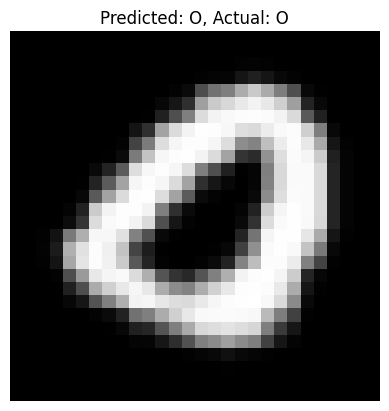

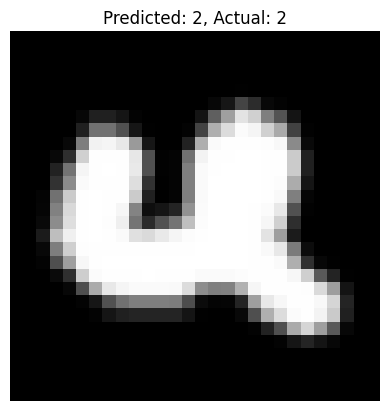

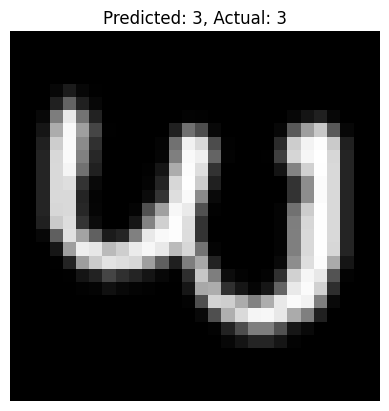

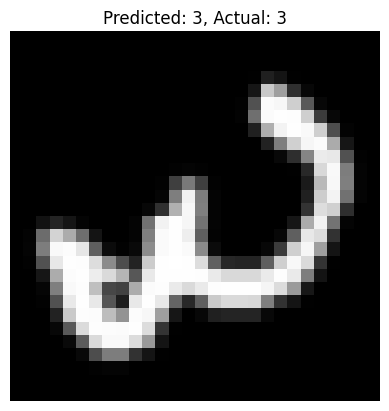

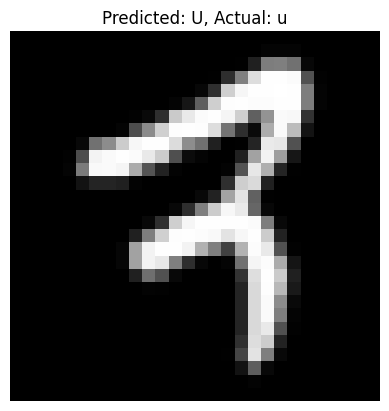

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import string

# Load EMNIST byclass dataset (digits + letters)
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

# Preprocess images and labels
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize images
    image = tf.expand_dims(image, -1)  # Add channel dimension
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).shuffle(10000).batch(64)
ds_test = ds_test.map(preprocess).batch(64)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(62, activation='softmax')  # 62 classes: 0-9, A-Z, a-z
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(ds_train, epochs=5, validation_data=ds_test)
+
# Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Define class names (digits 0-9 + uppercase A-Z + lowercase a-z)
class_names = list(string.digits + string.ascii_uppercase + string.ascii_lowercase)

# Visualize predictions for the first 5 test images
for image, label in ds_test.take(1).unbatch().take(5):
    prediction = model.predict(tf.expand_dims(image, 0), verbose=0)
    predicted_label = tf.argmax(prediction[0]).numpy()
    actual_label = label.numpy()

    plt.imshow(tf.squeeze(image), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[actual_label]}")
    plt.axis('off')
    plt.show()
